<a href="https://colab.research.google.com/github/SarkarPriyanshu/Machine-Learning-Models/blob/main/ANN_Students_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [189]:
!pip install keras_tuner -q

In [190]:
from google.colab import drive
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import keras_tuner as kt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
 

from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


In [191]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [192]:
!kaggle datasets download -d spscientist/students-performance-in-exams

students-performance-in-exams.zip: Skipping, found more recently modified local copy (use --force to force download)


In [193]:
import zipfile
zip_ref = zipfile.ZipFile('/content/students-performance-in-exams.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [194]:
df = pd.read_csv('/content/StudentsPerformance.csv')

## Basic Analysis

In [195]:
df.shape

(1000, 8)

In [196]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
82,male,group A,some college,free/reduced,completed,50,47,54
1,female,group C,some college,standard,completed,69,90,88
613,female,group C,associate's degree,standard,none,65,77,74
19,female,group C,associate's degree,free/reduced,none,54,58,61
369,female,group D,some high school,standard,none,73,84,85


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [198]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [199]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [200]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


## EDA

### EDA for writing score and reading score

In [201]:
df_WS = df.drop('reading score',axis=1)
df_RS = df.drop('writing score',axis=1)

In [202]:
def seperateFeaturesAndTarget(df,target_name):
  numericFeatures = list()
  categoricalFeatures = list()
  target = None

  for feature in df.columns:
    if (df[feature].dtype == 'int64' or df[feature].dtype == 'float64')  and feature != target_name:
      numericFeatures.append(feature)
    elif  df[feature].dtype == 'object':
      categoricalFeatures.append(feature)
    else:
      target = feature
  print(f'target : {target}\nNumeric : {numericFeatures}\ncategorical : {categoricalFeatures}')
  return numericFeatures,categoricalFeatures,target

In [203]:
numericFeatures_WS,categoricalFeatures_WS,target_WS = seperateFeaturesAndTarget(df_WS,'writing score')
numericFeatures_RS,categoricalFeatures_RS,target_RS = seperateFeaturesAndTarget(df_RS,'reading score')

target : writing score
Numeric : ['math score']
categorical : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
target : reading score
Numeric : ['math score']
categorical : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Univariant Analysis for both target columns

In [204]:
def showNumericAnalysis(df,numericFeatures):
  for feature in numericFeatures:
    fig, ax = plt.subplots(1,4,figsize=(20, 5))
    sns.histplot(df[feature], ax=ax[0])
    sns.distplot(df[feature], ax=ax[1])
    sns.boxplot(df[feature],ax=ax[2])
    stats.probplot(df[feature], plot=ax[3], fit=True)
    fig.show()

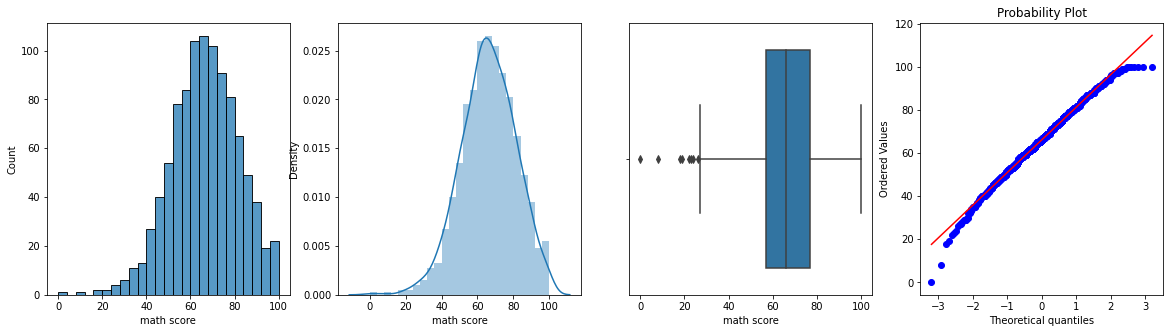

In [205]:
showNumericAnalysis(df_WS,numericFeatures_WS)

In [206]:
def showCategoricalFeatures(df,categoricalFeatures):
  for feature in categoricalFeatures:
    fig, ax = plt.subplots(1,2,figsize=(15, 5))
    sns.countplot(df[feature], ax=ax[0])
    df[feature].value_counts().plot(kind='pie',autopct='%.2f')
    fig.show()

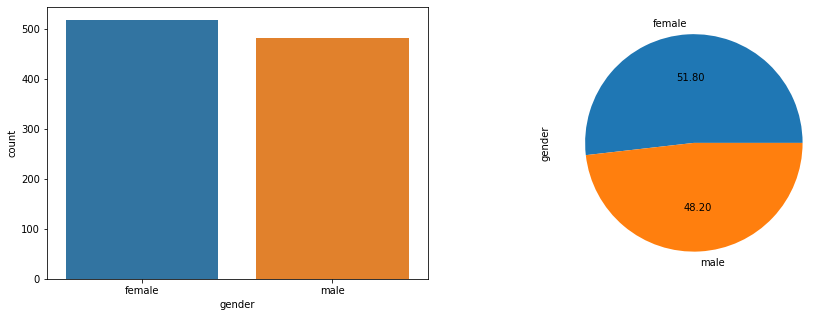

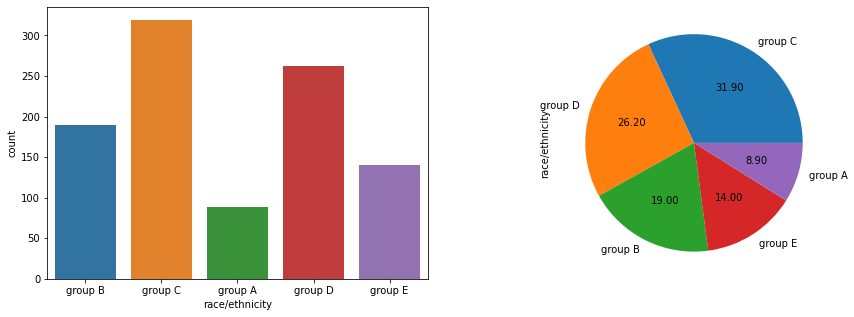

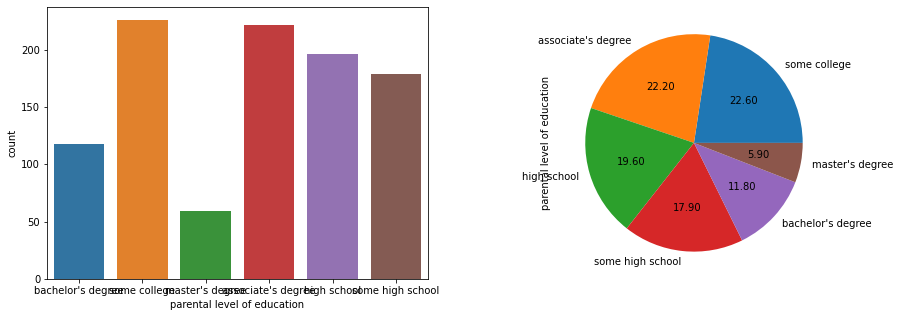

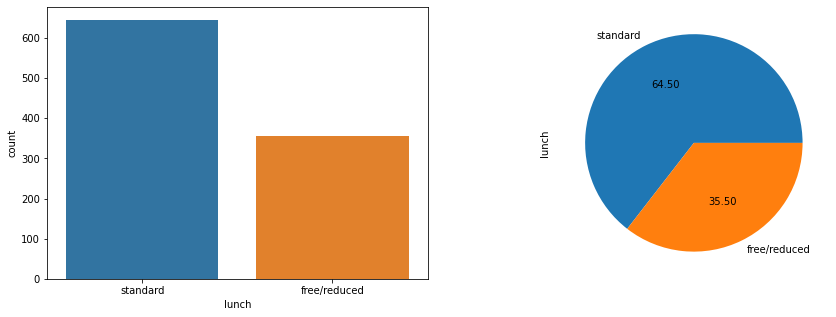

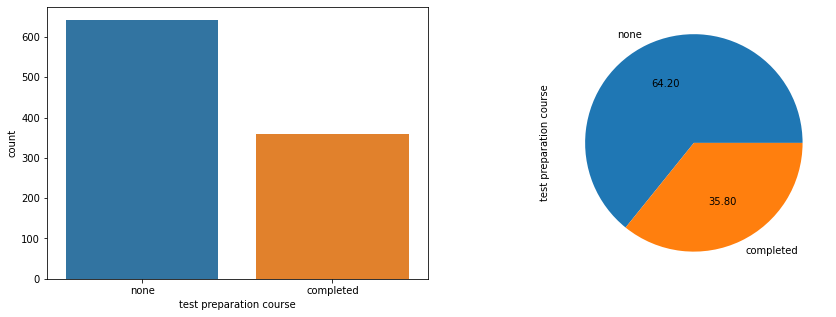

In [207]:
showCategoricalFeatures(df_WS,categoricalFeatures_WS)

### Multi-varient Aanlysis for both output column

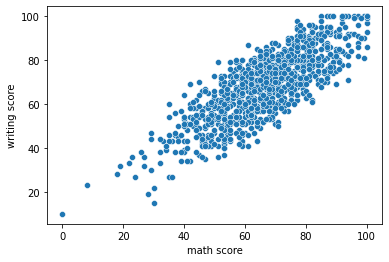

In [208]:
sns.scatterplot(df['math score'],df[target_WS])
plt.show()

<AxesSubplot:xlabel='math score', ylabel='writing score'>

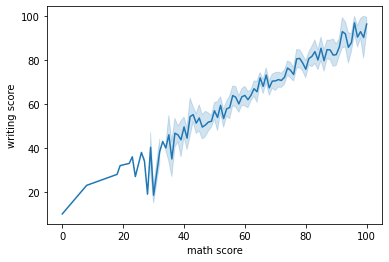

In [209]:
sns.lineplot(df['math score'],df[target_WS])

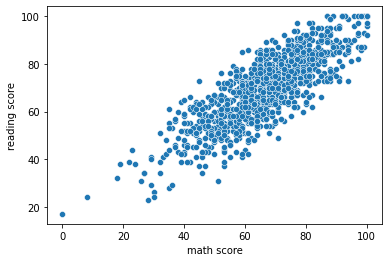

In [210]:
sns.scatterplot(df['math score'],df[target_RS])
plt.show()

<AxesSubplot:xlabel='math score', ylabel='reading score'>

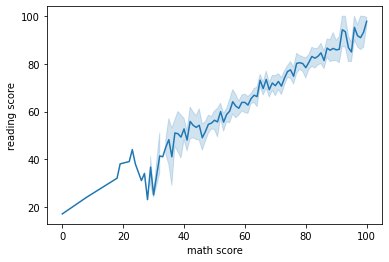

In [211]:
sns.lineplot(df['math score'],df[target_RS])

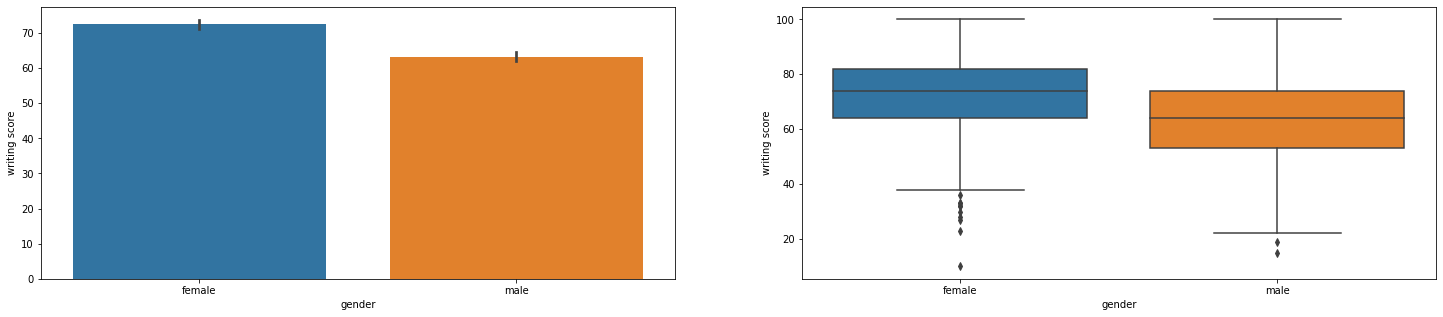

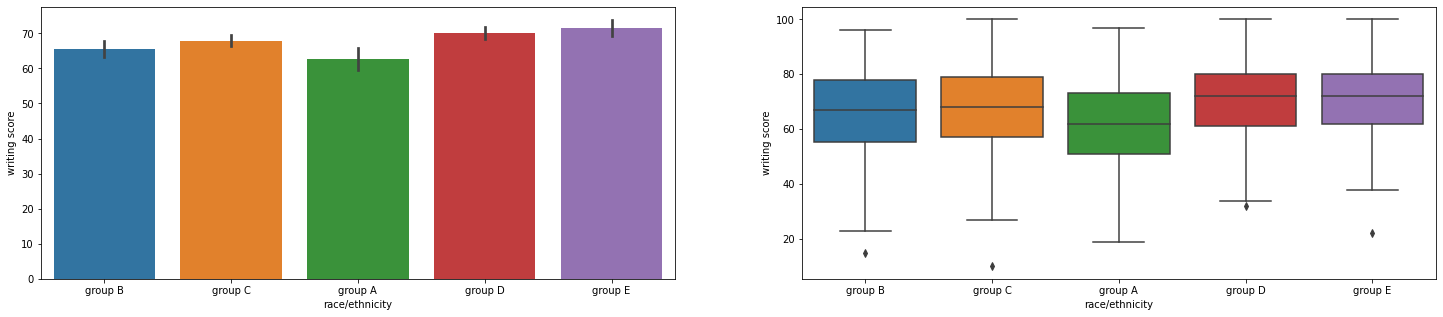

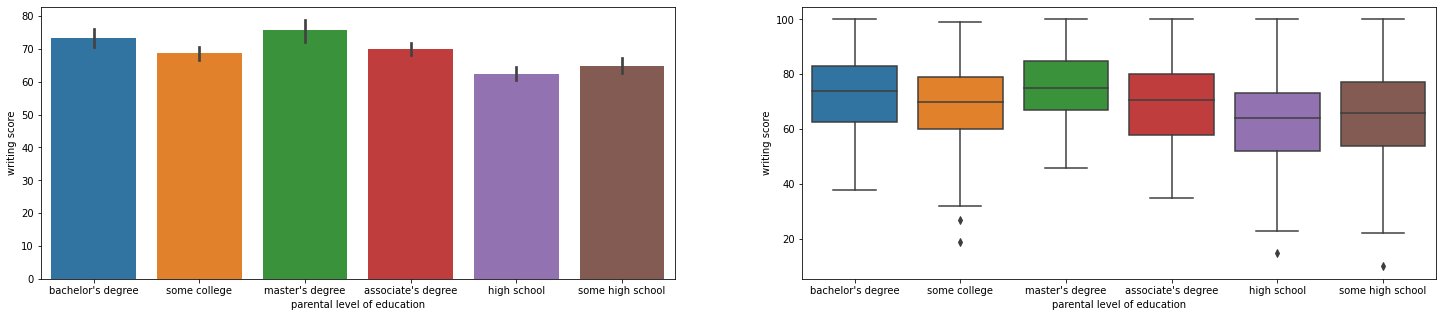

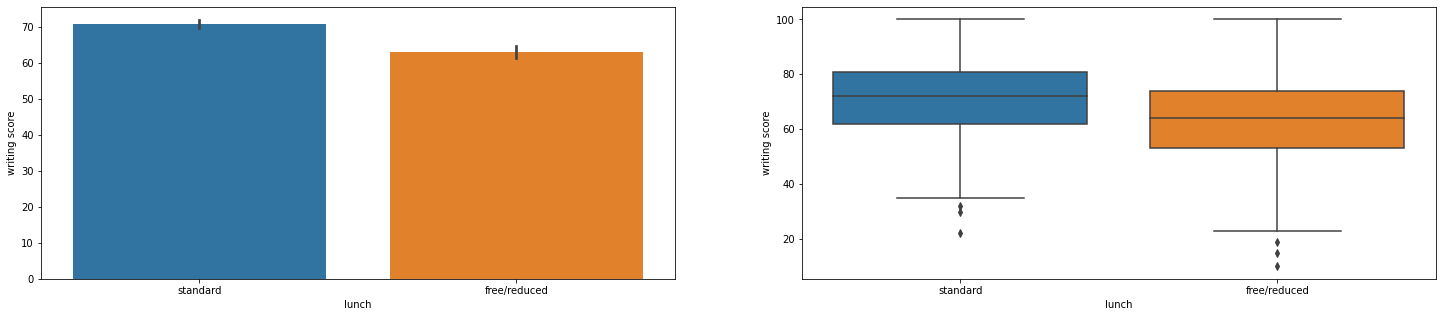

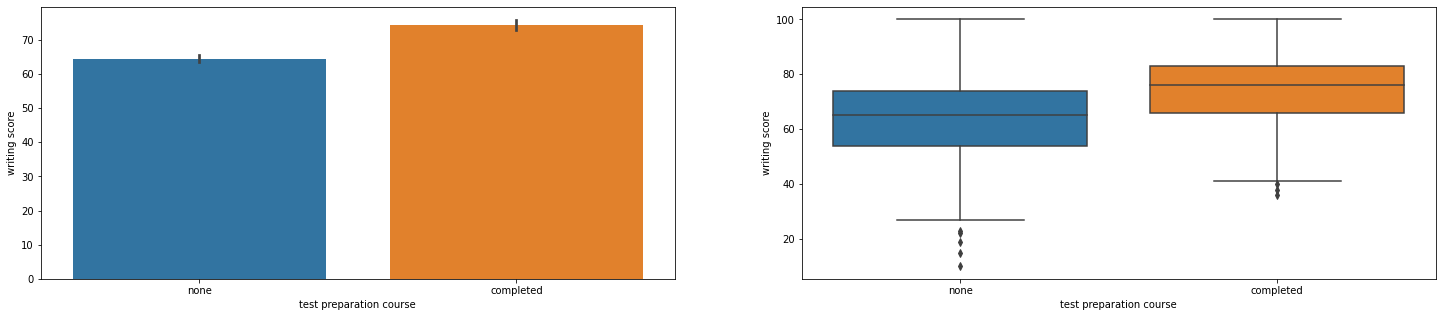

In [212]:
for feature in categoricalFeatures_WS:
  fig, ax = plt.subplots(1,2,figsize=(25, 5))
  sns.barplot(df[feature],df[target_WS],ax=ax[0])
  sns.boxplot(df[feature],df[target_WS],ax=ax[1])
  fig.show()

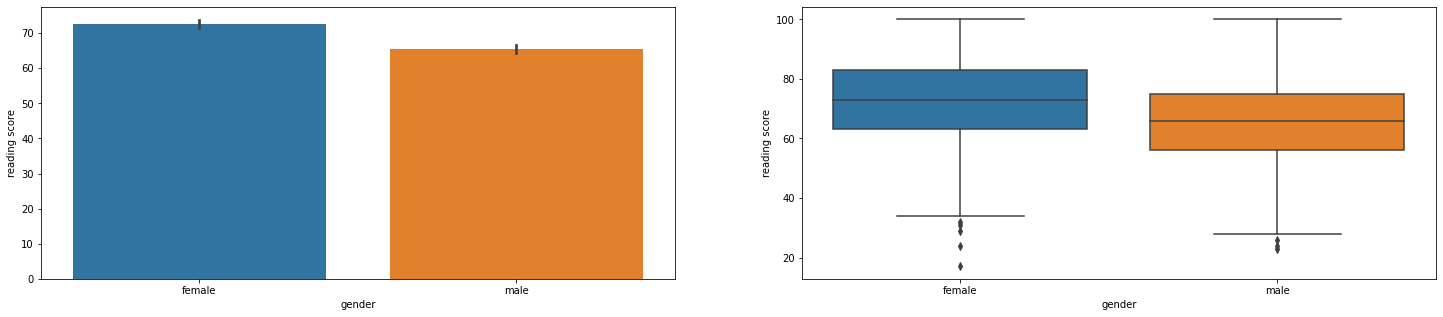

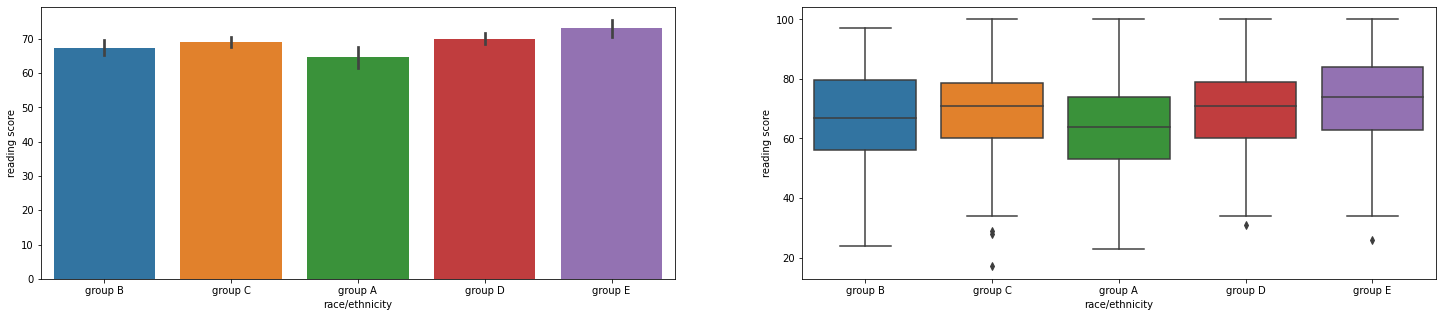

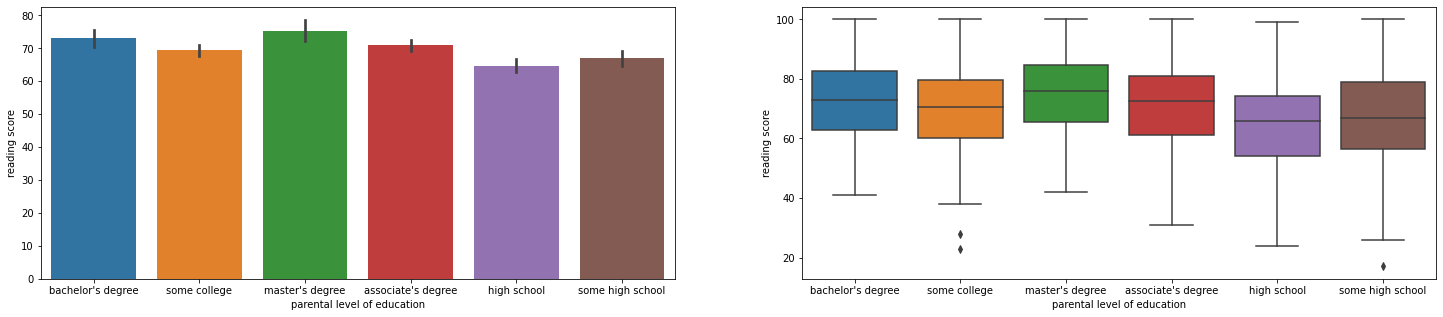

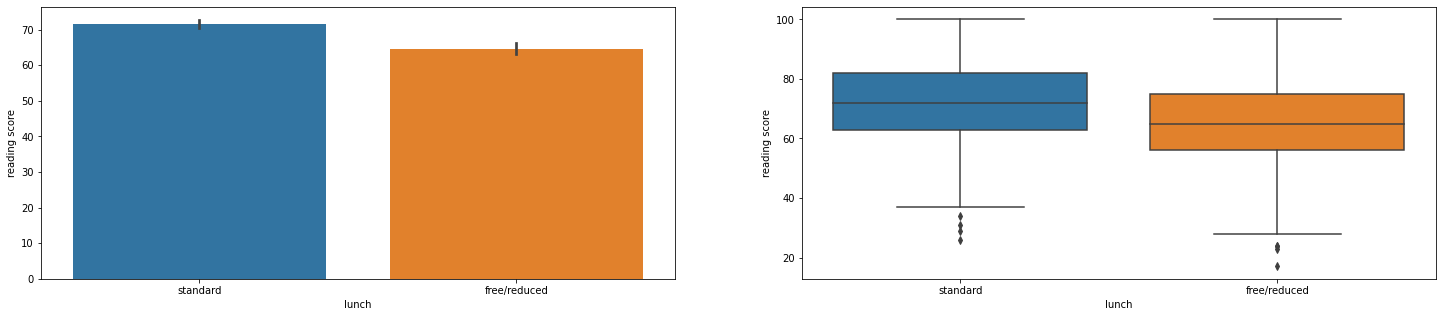

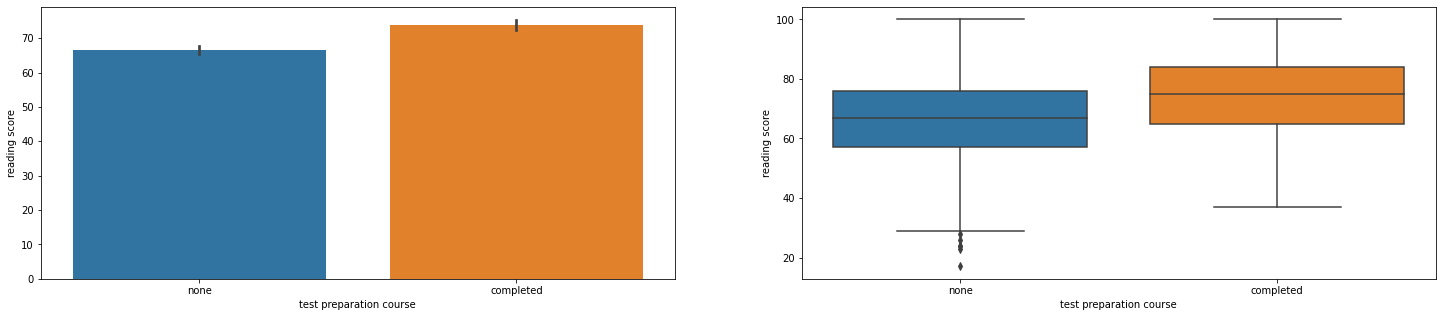

In [213]:
for feature in categoricalFeatures_WS:
  fig, ax = plt.subplots(1,2,figsize=(25, 5))
  sns.barplot(df[feature],df[target_RS],ax=ax[0])
  sns.boxplot(df[feature],df[target_RS],ax=ax[1])
  fig.show()

## Feature Engineering

#### Handling Outliers

In [214]:
def handleOutlierUsingIQR(feature,df):
  percentile_75 = np.percentile(df[feature],75)
  percentile_25 =  np.percentile(df[feature],25)

  IQR = percentile_75 - percentile_25

  UpperFence = percentile_75 + 1.5 * IQR
  LowerFence = percentile_25 - 1.5 * IQR

  df[feature] = np.where(df[feature] > UpperFence,UpperFence,np.where(df[feature] < LowerFence,LowerFence,df[feature]))

In [215]:
handleOutlierUsingIQR('math score',df_RS)
handleOutlierUsingIQR('math score',df_WS)

#### Handling Categorical Features

In [216]:
df_WS = pd.get_dummies(df_WS,columns=categoricalFeatures_WS,drop_first=True)
df_RS = pd.get_dummies(df_RS,columns=categoricalFeatures_WS,drop_first=True)

In [217]:
df_RS.sample(5)

,math score,reading score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
996,62.0,55,1,0,1,0,0,0,1,0,0,0,0,1
289,77.0,76,1,0,0,0,1,0,0,0,0,1,1,0
701,57.0,67,0,1,0,0,0,0,0,0,0,1,1,1
962,100.0,100,0,0,0,0,1,0,0,0,0,0,1,1
152,59.0,70,0,1,0,0,0,0,0,0,0,0,1,0


#### Scaling and spliting

In [218]:
X_train, X_test, y_train, y_test = train_test_split(df_WS.drop('writing score',axis=1), df_WS['writing score'], test_size=0.33, random_state=42)

In [219]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 13), (330, 13), (670,), (330,))

In [220]:
MinMaxScaler = MinMaxScaler(feature_range=(0, 1))

In [221]:
MinMaxScaler = MinMaxScaler.fit(X_train,y_train)

In [222]:
X_train = MinMaxScaler.transform(X_train)
X_test = MinMaxScaler.transform(X_test)

### Model Build and Evaluation

In [223]:
adam = keras.optimizers.Adam(
    learning_rate=0.01
)

In [224]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [225]:
model = Sequential()

initializer = keras.initializers.HeUniform()

model.add(Dense(5,activation='relu',kernel_initializer=initializer,input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(5,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='linear'))

model.compile(optimizer=adam,loss='mean_squared_error',metrics=['mae'])

In [226]:
history = model.fit(X_train,y_train,batch_size=X_train.shape[0]//10,epochs=100,validation_data=(X_test,y_test),callbacks=callback)

Epoch 1/100
10/10 [==============================] - 2s 40ms/step - loss: 4900.5469 - mae: 68.4036 - val_loss: 4724.9512 - val_mae: 66.8425
Epoch 2/100
10/10 [==============================] - 0s 14ms/step - loss: 4827.3838 - mae: 67.9316 - val_loss: 4671.4893 - val_mae: 66.4529
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 4740.8921 - mae: 67.3316 - val_loss: 4626.4683 - val_mae: 66.1386
Epoch 4/100
10/10 [==============================] - 0s 16ms/step - loss: 4631.1562 - mae: 66.5700 - val_loss: 4581.9644 - val_mae: 65.8670
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 4492.5967 - mae: 65.6220 - val_loss: 4483.4312 - val_mae: 65.2493
Epoch 6/100
10/10 [==============================] - 0s 12ms/step - loss: 4322.7017 - mae: 64.4702 - val_loss: 4297.9009 - val_mae: 63.9927
Epoch 7/100
10/10 [==============================] - 0s 14ms/step - loss: 4126.3008 - mae: 63.1053 - val_loss: 4005.1387 - val_mae: 61.8582
Epoch 8/100
10/10 [=

#### Comparing Basic ANN Model and ANN model with Batch Normalisation Layer + Weight Initialisation (HeUniform) + Early stopping

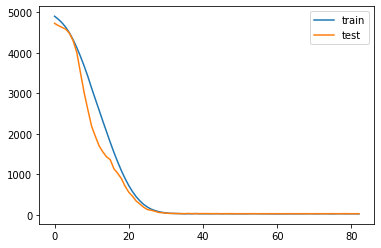

In [228]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

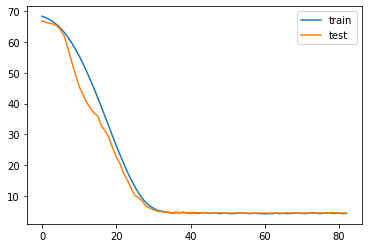

In [230]:
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.legend()
plt.show()
     

In [231]:
train_pred = model.predict(X_train)

21/21 [==============================] - 0s 2ms/step


In [232]:
r2_score(y_train,train_pred)

0.8842359257288341

In [233]:
test_pred = model.predict(X_test)

11/11 [==============================] - 0s 5ms/step


In [234]:
r2_score(y_test,test_pred)

0.8755376405176827

### Hyper Parameter Tuning of ANN model

In [254]:
def build_model(hp):
    model = Sequential()
    initializer = keras.initializers.HeUniform()

    model.add(Dense(5,activation='relu',kernel_initializer=initializer,input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    
    for i in range(hp.Int("num_layers", 1, 8)):
      model.add(Dense(3,activation=hp.Choice(f'activition {i}',values=['relu','sigmoid','tanh','elu','selu'])))
      model.add(BatchNormalization())

    model.add(Dense(1,activation='linear'))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='mean_squared_error',metrics=['mae'])
    return model

In [255]:
tuner = kt.RandomSearch(
    build_model,
    objective="val_mae",
    max_trials=5,
    directory="my_dir",
    project_name="helloworld",
)

In [256]:
tuner.search(X_train,y_train,epochs=10,batch_size=X_train.shape[0]//10,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 10s]
val_mae: 58.96210861206055

Best val_mae So Far: 53.99998092651367
Total elapsed time: 00h 00m 27s


In [257]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 8,
 'activition 0': 'relu',
 'activition 1': 'sigmoid',
 'activition 2': 'selu',
 'activition 3': 'sigmoid',
 'activition 4': 'relu',
 'activition 5': 'relu',
 'activition 6': 'relu',
 'activition 7': 'relu'}

In [258]:
model = tuner.get_best_models(num_models=1)[0]

In [259]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 70        
                                                                 
 batch_normalization (BatchN  (None, 5)                20        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 batch_normalization_1 (Batc  (None, 3)                12        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
 batch_normalization_2 (Batc  (None, 3)                1

In [260]:
history = model.fit(X_train,y_train,batch_size=X_train.shape[0]//10,epochs=100,initial_epoch=11,validation_data=(X_test,y_test),callbacks=callback)

Epoch 12/100
10/10 [==============================] - 7s 44ms/step - loss: 3751.2371 - mae: 60.4746 - val_loss: 2942.7708 - val_mae: 51.9177
Epoch 13/100
10/10 [==============================] - 0s 11ms/step - loss: 3552.6694 - mae: 58.9568 - val_loss: 2561.0884 - val_mae: 48.1670
Epoch 14/100
10/10 [==============================] - 0s 11ms/step - loss: 3354.3328 - mae: 57.3121 - val_loss: 2258.9629 - val_mae: 44.9771
Epoch 15/100
10/10 [==============================] - 0s 12ms/step - loss: 3142.5522 - mae: 55.5453 - val_loss: 2043.5193 - val_mae: 42.5651
Epoch 16/100
10/10 [==============================] - 0s 12ms/step - loss: 2931.8225 - mae: 53.6573 - val_loss: 1914.3485 - val_mae: 41.0392
Epoch 17/100
10/10 [==============================] - 0s 12ms/step - loss: 2717.8286 - mae: 51.6697 - val_loss: 1829.4800 - val_mae: 40.0518
Epoch 18/100
10/10 [==============================] - 0s 12ms/step - loss: 2504.3333 - mae: 49.5832 - val_loss: 1789.1058 - val_mae: 39.6271
Epoch 19/100


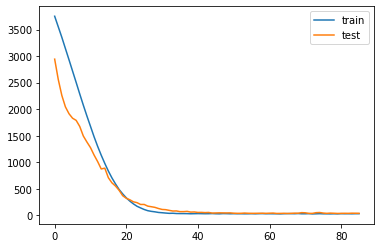

In [261]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

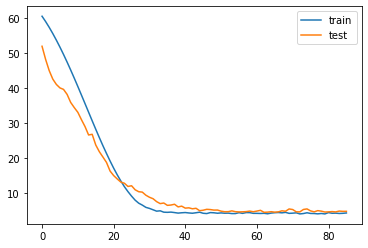

In [262]:
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.legend()
plt.show()
     

In [263]:
train_pred = model.predict(X_train)

21/21 [==============================] - 0s 2ms/step


In [264]:
r2_score(y_train,train_pred)

0.873685581985614